In [2]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from os.path import join as oj
import seaborn as sns
from tqdm import tqdm

In [3]:
results_dir = '/accounts/projects/vision/chandan/pacmed/results/pmlb'
# depending on how much is saved, this may take a while
# /scratch/users/vision/chandan/pacmed/logistic_basic
# /scratch/users/vision/chandan/pacmed/logistic_refit
out_dir = '/scratch/users/vision/chandan/pacmed/logistic_refit'
fnames = sorted([fname for fname in os.listdir(out_dir)])
results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in tqdm(fnames)]
results = pd.concat(results_list, axis=1).T.infer_objects()

100%|██████████| 74/74 [00:00<00:00, 203.49it/s]


In [4]:
results.head()

,dset_name,seed,class_weight,model_type,flip_frac,out_dir,pid,uncertainty_probit_flipped_diff_train,uncertainty_probit_flipped_diff_p_train,uncertainty_probit_loss_percentages_train,...,uncertainty_entropy_flipped_diff_p_test,uncertainty_entropy_loss_percentages_test,uncertainty_entropy_loss_performances_test,uncertainty_entropy_loss_auc_test,uncertainty_entropy_auc_percentages_test,uncertainty_entropy_auc_performances_test,uncertainty_entropy_auc_auc_test,uncertainty_entropy_calibration_pred_test,uncertainty_entropy_calibration_true_test,uncertainty_entropy_calibration_rmse_test
0,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,0,1,logistic,0.1,/scratch/users/vision/chandan/pacmed/logistic_...,57621007245688658283,0.0,NaN,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.364252,"[18.055555555555557, 18.333333333333332, 18.61...","[0.016521325654759007, 0.017921700258766535, 0...",1563.201961,"[18.055555555555557, 18.333333333333332, 18.61...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",81.661547,"[0.0507600599628103, 0.2780586871037834, 0.497...","[0.0, 0.08888888888888889, 0.2777777777777778,...",0.183882
1,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1,0,1,logistic,0.1,/scratch/users/vision/chandan/pacmed/logistic_...,13486222825253772121,0.0,NaN,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.483359,"[18.055555555555557, 18.333333333333332, 18.61...","[63.27296149780751, 64.09482026315642, 64.9175...",17090.974708,"[18.055555555555557, 18.333333333333332, 18.61...","[0.6489563567362429, 0.6470588235294118, 0.645...",47.339146,"[0.37639670196408975, 0.4989479685988271, 0.61...","[0.16666666666666666, 0.5072046109510087, 0.85...",0.186237
2,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1,0,1,logistic,0.1,/scratch/users/vision/chandan/pacmed/logistic_...,32758506405561574830,0.0,NaN,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.073866,"[18.055555555555557, 18.333333333333332, 18.61...","[62.94999877447274, 64.14888559003425, 65.3472...",17083.151638,"[18.055555555555557, 18.333333333333332, 18.61...","[0.603415559772296, 0.6029411764705882, 0.6024...",47.429128,"[0.3843279077116362, 0.5000486360912074, 0.610...","[0.25, 0.5129682997118156, 0.6]",0.078137
3,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1,0,1,logistic,0.1,/scratch/users/vision/chandan/pacmed/logistic_...,34538245428177067443,0.0,NaN,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.020240,"[18.055555555555557, 18.333333333333332, 18.61...","[63.00529448604597, 64.28025302902708, 65.0499...",17023.751169,"[18.055555555555557, 18.333333333333332, 18.61...","[0.6171428571428571, 0.6147465437788018, 0.614...",47.675651,"[0.37667845833379515, 0.5022144846769312, 0.63...","[0.48, 0.4952076677316294, 0.7272727272727273]",0.079581
4,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,0,1,logistic,0.1,/scratch/users/vision/chandan/pacmed/logistic_...,02883558114887360614,0.0,NaN,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.421455,"[18.055555555555557, 18.333333333333332, 18.61...","[59.39779914706781, 60.56826727590206, 61.7380...",16884.357535,"[18.055555555555557, 18.333333333333332, 18.61...","[0.7442084942084942, 0.7462406015037595, 0.743...",51.915930,"[0.39495161207219, 0.499933676341752, 0.605883...","[0.5, 0.5056179775280899, 1.0]",0.235510


# compare statistics

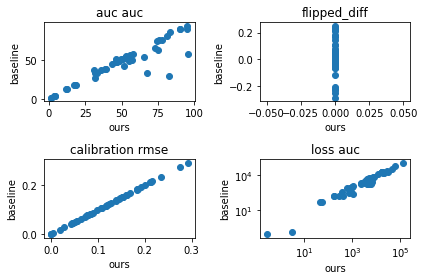

In [5]:
r = results

R, C = 2, 2
plt.subplot(R, C, 1)
plt.title('auc auc')
plt.plot(r.uncertainty_probit_auc_auc_test, r.uncertainty_entropy_auc_auc_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')


plt.subplot(R, C, 2)
plt.title('flipped_diff')
plt.plot(r.uncertainty_probit_flipped_diff_test, r.uncertainty_entropy_flipped_diff_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.subplot(R, C, 3)
plt.title('calibration rmse')
plt.plot(r.uncertainty_probit_calibration_rmse_test, r.uncertainty_entropy_calibration_rmse_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.subplot(R, C, 4)
plt.title('loss auc')
plt.plot(r.uncertainty_probit_loss_auc_test, r.uncertainty_entropy_loss_auc_test, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.tight_layout()
plt.savefig(oj(results_dir, 'pmlb_results.pdf'))
plt.show()

In [6]:
r['auc_auc_diff'] = r.uncertainty_probit_auc_auc_test - r.uncertainty_entropy_auc_auc_test

In [7]:
r2 = r
r2 = r2.sort_values(by='auc_auc_diff', ascending=False)
r2.auc_auc_diff

55    53.733198
34    37.239057
43    33.587887
36    11.685296
32    11.189258
23     9.857008
72     7.654104
44     6.679548
45     6.083955
68     4.675899
65     4.596556
63     2.348993
8      1.195858
70     0.650093
52     0.545616
40     0.540528
37     0.362665
49     0.051165
47     0.048087
33     0.000000
7      0.000000
54    -0.007848
56    -0.021655
48    -0.037414
35    -0.055341
30    -0.140992
73    -0.150470
0     -0.192073
53    -0.196793
25    -0.287694
        ...    
67    -1.827786
28    -1.973803
29    -2.007646
62    -2.831785
4     -5.621639
66    -5.708911
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
22          NaN
24          NaN
26          NaN
38          NaN
46          NaN
50          NaN
51          NaN
59          NaN
61          NaN
64          NaN
69          NaN
71          NaN
Name: auc_auc_diff, Leng

In [9]:
print('\\begin{tabular}{l | c | c}')
print('Dataset\t&\tClass-weight uncertainty AUC\t&\tUncertainty entropy AUC \\\\')
print('\hline')
for i in range(10):
    row = r2.iloc[i]
    print(f'{row.dset_name}\t&\t{row.uncertainty_probit_auc_auc_test:0.2f}\t&\t{row.uncertainty_entropy_auc_auc_test:0.2f}\\\\')
print('\end{tabular}')

\begin{tabular}{l | c | c}
Dataset	&	Class-weight uncertainty AUC	&	Uncertainty entropy AUC \\
\hline
hypothyroid	&	82.93	&	29.20\\
clean2	&	95.56	&	58.32\\
dis	&	67.35	&	33.76\\
coil2000	&	74.92	&	63.23\\
churn	&	65.50	&	54.32\\
banana	&	51.86	&	42.00\\
phoneme	&	72.74	&	65.08\\
flare	&	57.26	&	50.59\\
german	&	55.38	&	49.30\\
mushroom	&	94.88	&	90.20\\
\end{tabular}
